In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print("Failed to download file")

# Example usage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
filename = "automobileEDA.csv"
await download(url, filename)

In [3]:
df = pd.read_csv("automobileEDA.csv", header=0)

In [4]:
df.head()   

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
x = df['highway-mpg']
y = df['price']
x=x.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)
Yhat=lm.predict(x)
Yhat[0:5]   


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
print("Value of the intercept, a: ", lm.intercept_)
print("Value of the slope, b: ", lm.coef_)

Value of the intercept, a:  38423.305858157386
Value of the slope, b:  [-821.73337832]


In [7]:
lm=LinearRegression()
lm 
x= df[['engine-size']]
x.values.reshape(-1,1)
y=df['price']
lm.fit(x,y)
Yhat=lm.predict(x)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [8]:
lm.coef_

array([166.86001569])

In [9]:
lm.intercept_

-7963.338906281049

In [10]:
lm=LinearRegression()
lm
x = df[['engine-size', 'highway-mpg' , 'horsepower' , 'curb-weight']]
y = df['price']
lm.fit(x, y)

LinearRegression()

In [11]:
Yhat=lm.predict(x)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [12]:
lm.intercept_

-15806.624626329212

In [13]:
lm.coef_

array([81.53026382, 36.05748882, 53.49574423,  4.70770099])

In [14]:
lm1 = LinearRegression()
lm1
z = df[['highway-mpg' , 'normalized-losses']]
y = df[['price']]
lm1.fit(z,y)

LinearRegression()

In [15]:
lm1.intercept_ 

array([38201.31327246])

In [16]:

lm1.coef_

array([[-820.45434016,    1.49789586]])

<Axes: xlabel='highway-mpg', ylabel='price'>

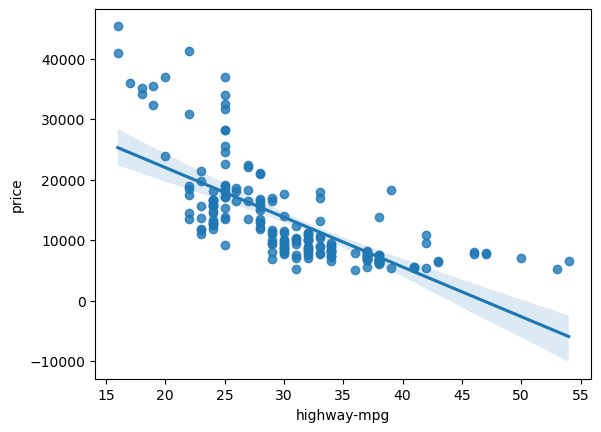

In [17]:

sns.regplot(x="highway-mpg", y="price", data=df)

(0.0, 47414.1)

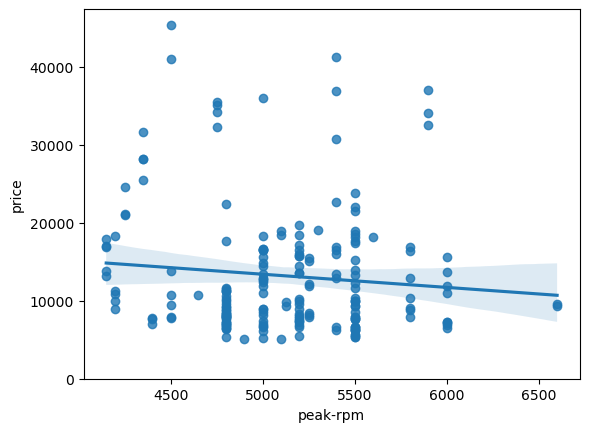

In [40]:
sns.regplot(x=df["peak-rpm"], y=df["price"])
plt.ylim(0,)

<Axes: xlabel='highway-mpg', ylabel='price'>

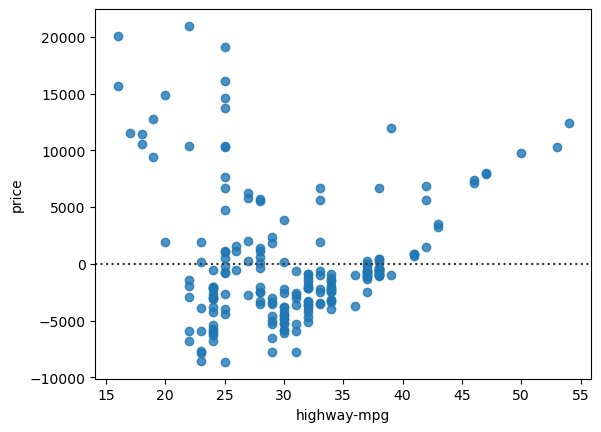

In [19]:
sns.residplot(x=df['highway-mpg'],y= df['price'])

<Axes: xlabel='engine-size', ylabel='price'>

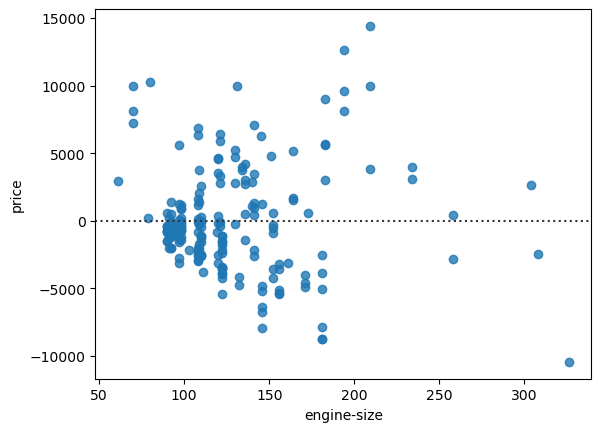

In [20]:
sns.residplot(x=df['engine-size'], y=df['price'])

In [92]:
x= df[['engine-size']].values.flatten()
y = df['price'].values
poly = np.polyfit(x, y, 3)
p = np.poly1d(poly)

In [52]:
x.min(), x.max()

(61, 326)

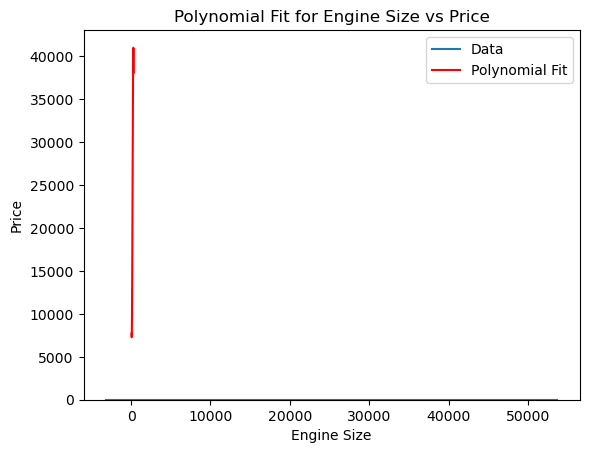

In [54]:
# Generate values for plotting
x_new = np.linspace(min(x), max(x), 100)
y_new = p(x_new)

# Create a DataFrame for the new data
poly_data = pd.DataFrame({'engine-size': x_new, 'price': y_new})

# Plot the original data distribution
sns.distplot(df['price'], hist=False, label='Data')

# Plot the polynomial fit
plt.plot(x_new, y_new, color='red', label='Polynomial Fit')

# Set plot labels and title
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Polynomial Fit for Engine Size vs Price')
plt.legend()
plt.show()

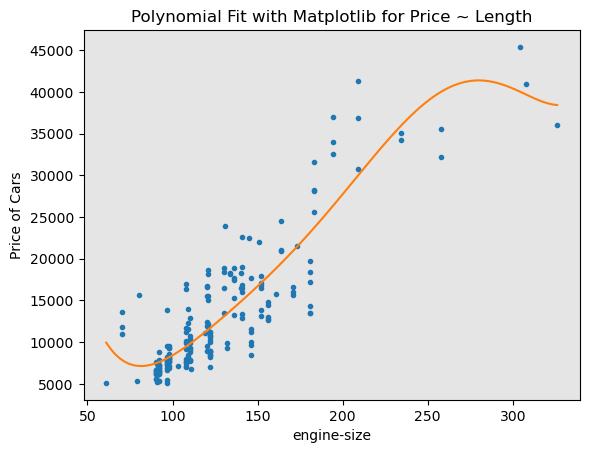

In [80]:
PlotPolly(p, x, y, 'engine-size')

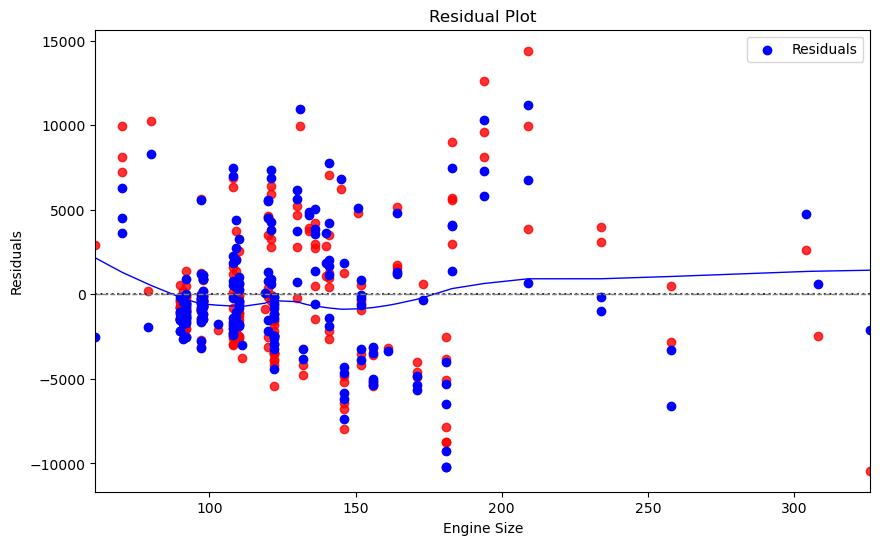

In [93]:
# Calculate predicted values and residuals
y_pred = p(x)
residuals = y - y_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=x, y=y, lowess=True, color='red', line_kws={'color': 'blue', 'lw': 1})
plt.scatter(x, residuals, color='blue', label='Residuals')
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)
plt.xlabel('Engine Size')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [ ]:
x= df[['engine-size']].values.flatten()
y = df['price'].values
poly = np.polyfit(x, y, 3)
p = np.poly1d(poly)

In [21]:
df[['engine-size',  'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [22]:
z = df[['highway-mpg' , 'normalized-losses' , 'engine-size' , 'horsepower' ]]
y = df[['price']]   
lm1.fit(z, y)
yhat = lm1.predict(z)

<Axes: xlabel='price', ylabel='Density'>

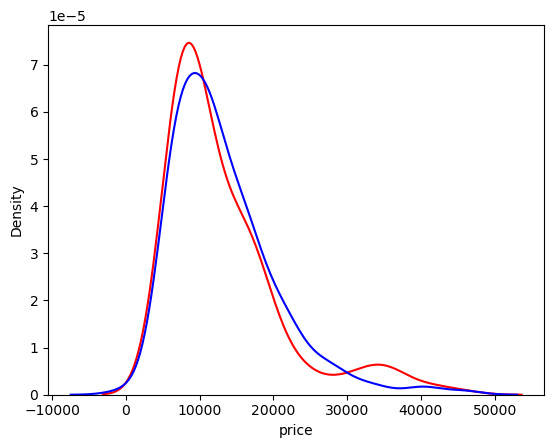

In [23]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

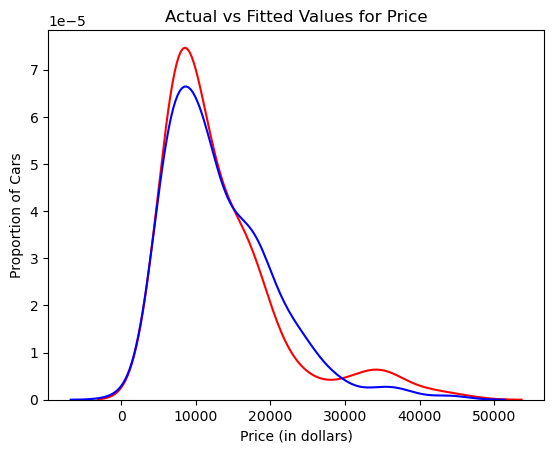

In [24]:



ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [25]:
x=df['highway-mpg'].values.reshape(-1,1)
y=df['price']
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)


LinearRegression()

In [26]:
df['highway-mpg'].min()

16

In [27]:
# Function to plot polynomial regression
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()


In [28]:
x=df['highway-mpg']
y=df['price']

In [29]:

f=np.polyfit(x,y,5)
p=np.poly1d(f)
print(p)


           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


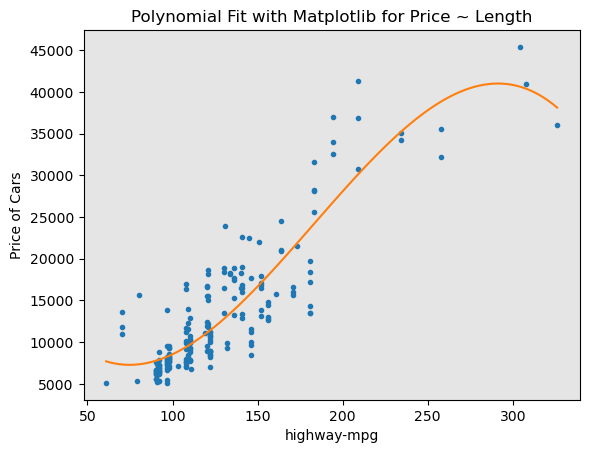

In [55]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


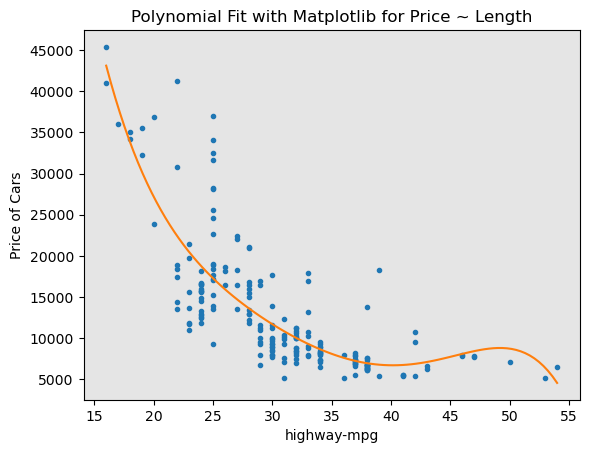

In [31]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p, x, y, 'highway-mpg')

In [32]:
p = np.polyfit(x, y, 5)
print(p)
f = np.poly1d(p)
print(f)

[-6.99832843e-03  1.22284271e+00 -8.43003409e+01  2.90845868e+03
 -5.15209922e+04  3.95385040e+05]
           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


In [33]:
pr=PolynomialFeatures(degree=2)
pr
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z)

In [34]:
Z_pr.shape

(201, 15)

In [35]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [36]:
z =z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
pipe.predict(z)

ypipe=pipe.predict(z)
ypipe[0:4]

array([13577.66984348, 13577.66984348, 18519.55606725, 10661.62393692])

In [38]:
pipe.score(z,y)

0.8392090552699265

In [39]:
input = [('standard' , StandardScaler()) , ( 'model' , LinearRegression())]
pippe = Pipeline(input)
pippe.fit(z,y)
ypipe = pippe.predict(z)    
ypipe[0:10]

array([14411.93319063, 14411.93319063, 18982.77121955, 11076.2275025 ,
       15990.13199536, 15374.52113395, 15366.83811273, 15374.52113395,
       16697.25158306, 11047.64834975])

In [102]:
x= df['highway-mpg'].values
y=df['price']
f = np.polyfit(x, y, 3)
f
p=np.poly1d(f)
print(p)
yhat = p(x)
print(yhat[0:4])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05
[14483.47732606 14483.47732606 15876.76908652 11210.24198667]


In [103]:
poly = PolynomialFeatures(degree=3)
z_poly = poly.fit_transform(z)
z_poly


array([[1.000000e+00, 2.700000e+01, 1.220000e+02, ..., 1.875900e+06,
        1.601730e+06, 1.367631e+06],
       [1.000000e+00, 2.700000e+01, 1.220000e+02, ..., 1.875900e+06,
        1.601730e+06, 1.367631e+06],
       [1.000000e+00, 2.600000e+01, 1.220000e+02, ..., 3.558016e+06,
        3.604832e+06, 3.652264e+06],
       ...,
       [1.000000e+00, 2.300000e+01, 9.500000e+01, ..., 4.010486e+06,
        3.106388e+06, 2.406104e+06],
       [1.000000e+00, 2.700000e+01, 9.500000e+01, ..., 2.228650e+06,
        1.629220e+06, 1.191016e+06],
       [1.000000e+00, 2.500000e+01, 9.500000e+01, ..., 2.266434e+06,
        1.832436e+06, 1.481544e+06]])